#  Algorithms Assessment

Using [this](https://github.com/abreukuse/ml_utilities/blob/master/algorithms_assessment.py) python module you can make quick assessments about the performance of machine learning algorithms. 
There´s two classes in it. One is `ValidationCurves` with which is possible to analyze how a specific model behaves regarding changes in some hyperparameter. The other one is the `LeaningCurves`, and with this one you can look at the performance regarding a increasing sample size.

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from algorithms_assessment import ValidationCurves, LearningCurves

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

target_names = {0: 'malignant',
               1: 'benign'}
df.target.replace(target_names, inplace=True)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Validation Curves

In [5]:
# The hyperparameter 'C' will be analysed
model = LogisticRegression(C=None, random_state=60)
hyperparameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [6]:
assessment = ValidationCurves(X, y,
                              estimator=model,
                              hyperparameter='C',
                              metric='accuracy',
                              validation=2)

C  =  0.001
Train: 0.954 | Validation: 0.924

C  =  0.01
Train: 0.944 | Validation: 0.926

C  =  0.1
Train: 0.953 | Validation: 0.919

C  =  1
Train: 0.954 | Validation: 0.937

C  =  10
Train: 0.956 | Validation: 0.937

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.954 | Validation: 0.94



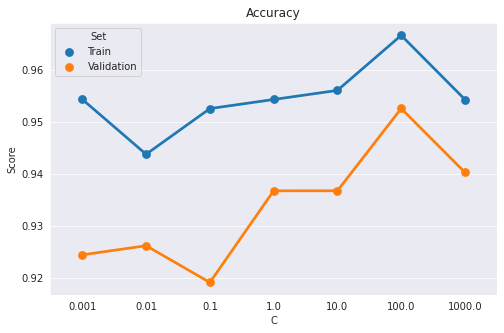

In [7]:
assessment.validation_curves(param_values=hyperparameters)

C  =  0.001
Train: 0.954 | Validation: 0.924

C  =  0.01
Train: 0.944 | Validation: 0.926

C  =  0.1
Train: 0.953 | Validation: 0.919

C  =  1
Train: 0.954 | Validation: 0.937

C  =  10
Train: 0.956 | Validation: 0.937

C  =  100
Train: 0.967 | Validation: 0.953

C  =  1000
Train: 0.954 | Validation: 0.94



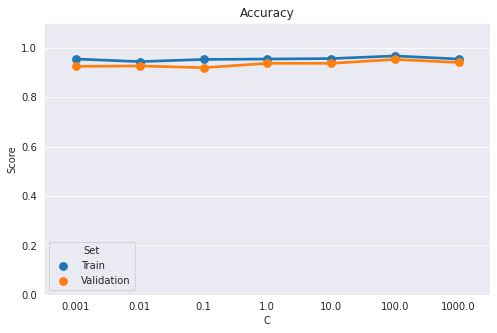

In [8]:
# The scale of the plot can be changed
assessment.validation_curves(param_values=hyperparameters, ylim=(0,1.1))

In [9]:
# And the table result can be accessed
assessment.table

,C,Train,Validation
0,0.001,0.954312,0.924444
1,0.010,0.943767,0.926198
2,0.100,0.952539,0.919144
3,1.000,0.954287,0.936743
4,10.000,0.956035,0.936749
5,100.000,0.966605,0.952557
6,1000.000,0.954281,0.940277


In [10]:
# Testing a decision tree with recall as the metric

depths = [3,5,7,9,11,13,15]
tree = DecisionTreeClassifier(max_depth=None)

recall = make_scorer(recall_score, average='binary', pos_label='benign')

In [12]:
assessment_decision_tree = ValidationCurves(X, y, 
                                            estimator=tree, 
                                            hyperparameter='max_depth',
                                            metric=recall,
                                            validation=2,
                                            metric_name='recall')

max_depth  =  3
Train: 0.989 | Validation: 0.933

max_depth  =  5
Train: 1.0 | Validation: 0.936

max_depth  =  7
Train: 1.0 | Validation: 0.922

max_depth  =  9
Train: 1.0 | Validation: 0.91

max_depth  =  11
Train: 1.0 | Validation: 0.885

max_depth  =  13
Train: 1.0 | Validation: 0.935

max_depth  =  15
Train: 1.0 | Validation: 0.927



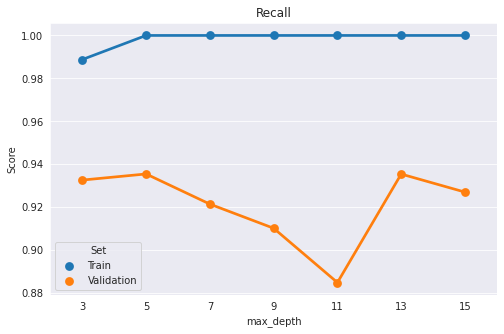

In [13]:
assessment_decision_tree.validation_curves(param_values = depths)

In [14]:
assessment_decision_tree.table

,max_depth,Train,Validation
0,3,0.988795,0.932694
1,5,1.000000,0.935534
2,7,1.000000,0.921505
3,9,1.000000,0.910269
4,11,1.000000,0.885004
5,13,1.000000,0.935487
6,15,1.000000,0.927092


## Learning Curves

In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=40)

In [16]:
learning = LearningCurves(X, y, 
                          estimator=tree, 
                          validation=2, 
                          metric='accuracy', 
                          step_size=50, 
                          shuffle=True)

Samples: 50
Train: 1.0 | Validation: 0.9

Samples: 100
Train: 0.99 | Validation: 0.91

Samples: 150
Train: 0.993 | Validation: 0.9

Samples: 200
Train: 0.98 | Validation: 0.92

Samples: 250
Train: 0.984 | Validation: 0.924

Samples: 300
Train: 0.987 | Validation: 0.933

Samples: 350
Train: 0.977 | Validation: 0.949

Samples: 400
Train: 0.98 | Validation: 0.938

Samples: 450
Train: 0.98 | Validation: 0.893

Samples: 500
Train: 0.986 | Validation: 0.92

Samples: 550
Train: 0.984 | Validation: 0.933



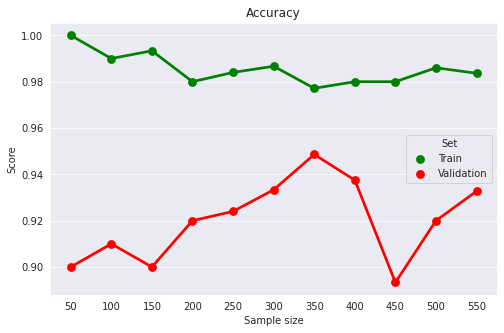

In [17]:
learning.learning_curves()

In [18]:
learning.table

,Sample size,Train,Validation
0,50,1.000000,0.900000
1,100,0.990000,0.910000
2,150,0.993333,0.900000
3,200,0.980000,0.920000
4,250,0.984000,0.924000
5,300,0.986667,0.933333
6,350,0.977143,0.948571
7,400,0.980000,0.937500
8,450,0.980000,0.893333
9,500,0.986000,0.920000
